In [20]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics import cohen_kappa_score
import seaborn as sns

In [21]:
dataset = json.load(open("../../survey_result/dataset.json", 'r')) 

In [22]:
ds_score = np.array([data['num'] for data in dataset if data['model'] == 'DS'])
gpt_score = np.array([data['num'] for data in dataset if data['model'] == 'GPT'])

In [23]:
ds_score.shape

(200, 5)

In [24]:
from scipy import stats

for i in ds_score.T:
    _, p1 = stats.shapiro(i)
    print(p1)
print('/n')
for i in gpt_score.T:
    _, p1 = stats.shapiro(i)
    print(p1)

6.0976202016678285e-18
4.796400826188321e-16
6.695032456648225e-17
1.006578650183769e-13
1.6632467066018714e-15
/n
1.9683146487503518e-17
4.1981060283895894e-14
1.8384050792102924e-12
1.4364699615345908e-14
5.0505546501987495e-15


In [25]:
labels = ['Effectiveness', 'Accuracy', 'Personalization', 'Safety', 'Emotional Care']

for i in range(len(labels)):
    print(labels[i])
    u_stat, p_mannu = stats.mannwhitneyu(ds_score.T[i], gpt_score.T[i])
    print(f"Mann-Whitney U检验: U = {u_stat:.3f}, p = {p_mannu:.3f}")

Effectiveness
Mann-Whitney U检验: U = 21231.000, p = 0.231
Accuracy
Mann-Whitney U检验: U = 24766.000, p = 0.000
Personalization
Mann-Whitney U检验: U = 25554.500, p = 0.000
Safety
Mann-Whitney U检验: U = 21815.000, p = 0.086
Emotional Care
Mann-Whitney U检验: U = 24346.000, p = 0.000


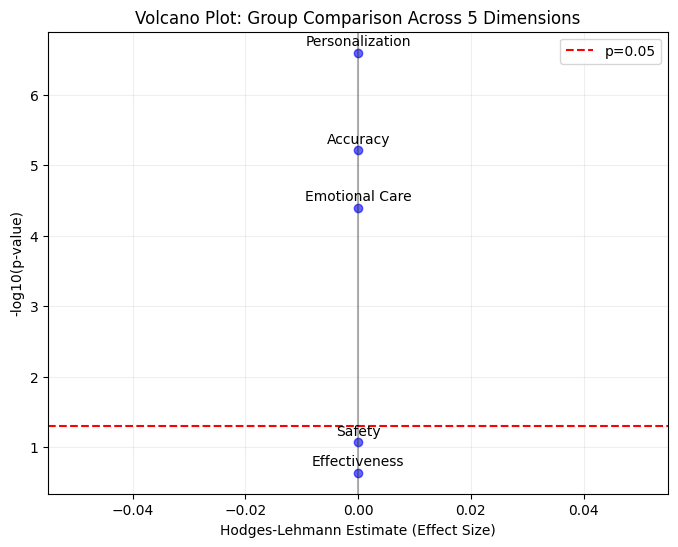

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 存储结果
effects = []
p_values = []

for i in range(len(labels)):
    # Mann-Whitney U检验
    u_stat, p = stats.mannwhitneyu(ds_score.T[i], gpt_score.T[i])
    p_values.append(p)
    
    # Hodges-Lehmann估计
    diff = np.subtract.outer(ds_score.T[i], gpt_score.T[i]).ravel()
    hl = np.median(diff)
    effects.append(hl)

# 转换为对数p值
log_p = -np.log10(p_values)

# 绘制火山图
plt.figure(figsize=(8, 6))
plt.scatter(effects, log_p, color='blue', alpha=0.6)
plt.axhline(-np.log10(0.05), color='red', linestyle='--', label='p=0.05')  # 显著性阈值
plt.axvline(0, color='black', linestyle='-', alpha=0.3)

# 标注维度名称
for i, label in enumerate(labels):
    plt.annotate(label, (effects[i], log_p[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Hodges-Lehmann Estimate (Effect Size)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot: Group Comparison Across 5 Dimensions')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [27]:
print(p_values)

[0.23067123778109921, 6.1450648195852974e-06, 2.527545986462849e-07, 0.08580370756356938, 3.998984355193462e-05]


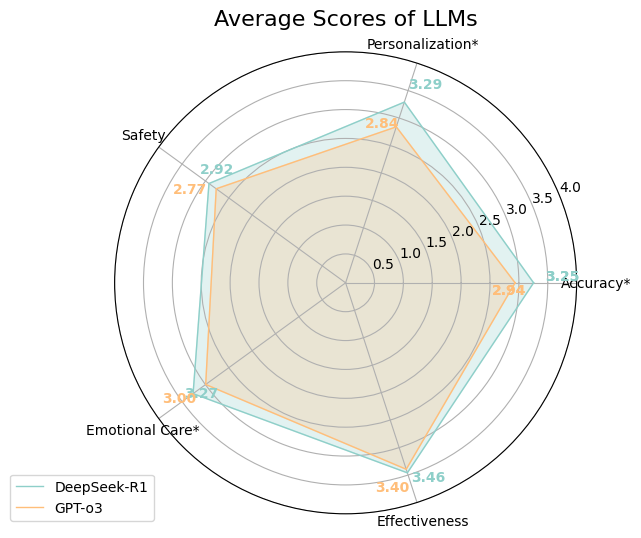

In [9]:
labels = ['Effectiveness', 'Accuracy', 'Personalization', 'Safety', 'Emotional Care']
ds_values = np.average(ds_score, axis=0).tolist()
gpt_values = np.average(gpt_score, axis=0).tolist()

ds_var = np.var(ds_score, axis=0).tolist()
gpt_var = np.var(gpt_score, axis=0).tolist()

for i in range(len(labels)):
    u_stat, p_mannu = stats.mannwhitneyu(ds_score.T[i], gpt_score.T[i])
    if p_mannu < 0.01:
        labels[i] += "*"

ds_values = ds_values[1:] + ds_values[:1]
gpt_values = gpt_values[1:] + gpt_values[:1]
labels = labels[1:] + labels[:1]

ds_values += ds_values[:1]
gpt_values += gpt_values[:1]
labels += labels[:1]

num_vars = len(labels) - 1
angles = np.linspace(0 * np.pi, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, ds_values, linewidth=1, label='DeepSeek-R1', color="#8ECFC9")
ax.fill(angles, ds_values, alpha=0.25, color="#8ECFC9")
# for angle, mean, variance in zip(angles, ds_values, ds_var):
#     ax.errorbar(angle, mean, yerr=variance, color='#8ECFC9', capsize=2, capthick=2, label='DeepSeek-R1 Variance' if angle == angles[0] else "")
for i, (angle, value) in enumerate(zip(angles, ds_values)):
    ax.text(angle, value + 0.2, f'{value:.2f}', ha='left', va='bottom', fontsize=10, color="#8ECFC9", fontweight="bold")

ax.plot(angles, gpt_values, linewidth=1, label='GPT-o3', color="#FFBE7A")
ax.fill(angles, gpt_values, alpha=0.25, color="#FFBE7A")
# for angle, mean, variance in zip(angles, gpt_values, gpt_var):
#     ax.errorbar(angle, mean, yerr=variance, color='#FFBE7A', capsize=2, capthick=2, label='GPT-o3 Variance' if angle == angles[0] else "")
for i, (angle, value) in enumerate(zip(angles, gpt_values)):
    ax.text(angle, value + 0.2, f'{value:.2f}', ha='right', va='top', fontsize=10, color="#FFBE7A", fontweight="bold")

ax.set_ylim(0, 4)
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
# ax.tick_params(axis='both', labelsize=18) 
ax.set_title('Average Scores of LLMs', va='bottom', fontsize=16)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [10]:
group_index = [[37, 19, 29, 89, 76, 26, 28, 86, 31, 1, 99, 71, 23, 42, 48, 34, 47, 73, 77, 87, 49, 54, 91, 83, 94, 56, 74, 27, 21, 95, 18, 79, 9, 61, 58, 80, 62, 4, 30, 66, 39, 2, 64, 20, 96, 85, 14, 88, 68, 11, 183, 166, 129, 130, 108, 160, 143, 106, 112, 137, 126, 159, 175, 101, 110, 118, 153, 156, 131, 104, 147, 168, 125, 174, 114, 119, 120, 109, 133, 122, 169, 177, 134, 128, 136, 138, 180, 102, 105, 150, 113, 197, 179, 123, 187, 157, 152, 158, 127, 151], [60, 41, 3, 22, 15, 97, 84, 72, 13, 10, 35, 43, 55, 17, 75, 5, 45, 67, 63, 70, 12, 82, 36, 57, 78, 33, 53, 65, 32, 51, 69, 24, 100, 16, 93, 44, 50, 52, 46, 6, 59, 81, 92, 40, 25, 38, 90, 7, 98, 8, 163, 185, 115, 140, 176, 145, 146, 172, 165, 124, 132, 188, 193, 121, 161, 190, 142, 162, 148, 139, 192, 144, 111, 141, 196, 191, 186, 164, 155, 184, 167, 199, 171, 189, 182, 0, 178, 107, 195, 194, 117, 135, 103, 116, 181, 149, 170, 154, 198, 173]]

In [11]:
def get_kappa(reviewer_1, reviewer_2):
    result = []

    for i in range(5):
        rater1 = reviewer_1[:, i]
        rater2 = reviewer_2[:, i]
        kappa = cohen_kappa_score(rater1, rater2)

        from sklearn.metrics import confusion_matrix
        confusion = confusion_matrix(rater1, rater2)

        n_classes = confusion.shape[0]
        total = np.sum(confusion) 

        P_o = np.sum(np.diag(confusion)) / total

        row_sums = np.sum(confusion, axis=1)
        col_sums = np.sum(confusion, axis=0)
        P_e = np.sum(row_sums * col_sums) / (total ** 2)

        from math import sqrt
        SE_kappa = sqrt((P_o * (1 - P_o)) / (total * (1 - P_e)**2))

        z_stat = kappa / SE_kappa

        from scipy.stats import norm
        p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # 双尾检验
        # kappa = (P_o - P_e) / (1 - P_e)
        result.append({
            "dim": i,
            "CK": kappa,
            "观察一致性 (P_o)": P_o,
            "期望一致性 (P_e)": P_e,
            "标准误 (SE_kappa)": SE_kappa,
            "z": z_stat,
            "p": p_value,
            "显著性": p_value<0.05
        })
    return result

In [12]:
def draw_heatmap(rater1, rater2, title):
    kappa_result = get_kappa(rater1, rater2)

    from sklearn.metrics import confusion_matrix

    confusion_matrices = []

    dims = ['Effectiveness', 'Accuracy', 'Personalization', 'Safety', 'Emotional Care']

    for dim in range(5):
        cm = confusion_matrix(rater1[:, dim], rater2[:, dim], labels=[1, 2, 3, 4, 5])
        confusion_matrices.append(cm)
    
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    for i, cm in enumerate(confusion_matrices):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
        axes[i].set_title(dims[i] + f'\nCohen\'s Kappa = {kappa_result[i]["CK"]:.2f}, P = {kappa_result[i]["p"]:.3f}')
        axes[i].set_xlabel('Rater 2')
        axes[i].set_ylabel('Rater 1')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [13]:
score_list = [0, 1, 2, 3, 4]
count_list = []

def get_freq(score):
    values, counts = np.unique(score, return_counts=True)
    frequency_dict = {num: 0 for num in score_list}
    for value, count in zip(values, counts):
        if value in frequency_dict:
            frequency_dict[value] = count
    return list(frequency_dict.values())

for i in range(5):
    ds_freq = get_freq(ds_score[:,i])
    gpt_freq = get_freq(gpt_score[:,i])
    count_list.append(np.array([ds_freq, gpt_freq])/200)

In [14]:
def plot_col(data):
    dimensions = [0, 1, 2, 3, 4]
    dims = ['Effectiveness', 'Accuracy', 'Personalization', 'Safety', 'Emotional Care']

    categories = ['DeepSeek-R1', 'GPT-o3']

    fig, axes = plt.subplots(1, 5, figsize=(20, 4)) 
    colors = ['#8ECFC9', '#FFBE7A']

    for i, ax in enumerate(axes):
        group_data = data[i]  
        bar_width = 0.35 
        x = np.arange(len(dimensions))

        for j, category in enumerate(categories):
            bars = ax.bar(x + j * bar_width, group_data[j], width=bar_width, label=category, color=colors[j])
            for k, bar in enumerate(bars):
                height = bar.get_height()  # 获取柱子高度
                ax.text(
                    bar.get_x() + bar.get_width() / 2,  # 文本 x 坐标（柱子中心）
                    height + 0.01,                      # 文本 y 坐标（柱子顶部稍高处）
                    f'{height:.2f}',                       # 显示的数值
                    ha='center',                       # 水平居中对齐
                    va='bottom',                       # 垂直底部对齐
                    fontsize=7                         # 字体大小
                )
        
        ax.set_ylim(0, 0.65)
        ax.set_title(dims[i])
        ax.set_xticks(x + bar_width / 2)
        ax.set_xticklabels(dimensions)
        ax.set_xlabel('Score')
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.tight_layout()
    plt.show()

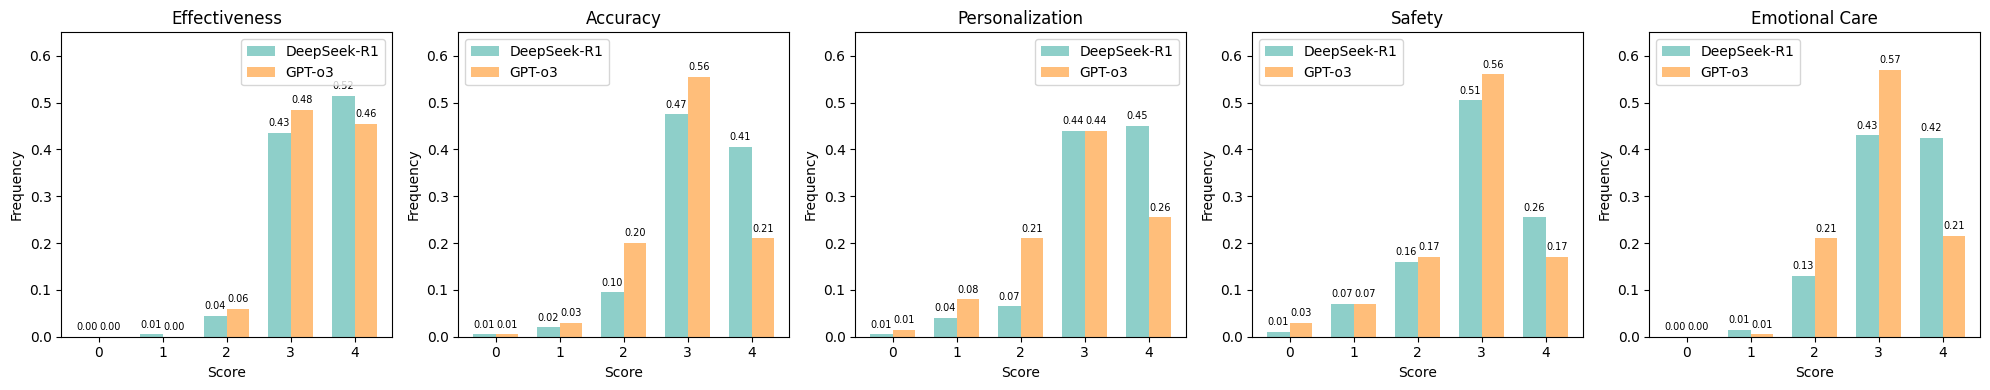

In [15]:
plot_col(count_list)

In [16]:
money_time = json.load(open("../../survey_result/money_time.json"))

In [17]:
def plot_bar(ax, title, y_label, dimensions, data, colors, categories):
    bar_width = 0.35 
    x = np.arange(len(dimensions))
    for j, category in enumerate(categories):
        bars = ax.bar(x + j * bar_width, data[j], width=bar_width, label=category, color=colors[j])
        for k, bar in enumerate(bars):
            height = bar.get_height()  # 获取柱子高度
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # 文本 x 坐标（柱子中心）
                height * 1.01,                      # 文本 y 坐标（柱子顶部稍高处）
                height,                       # 显示的数值
                ha='center',                       # 水平居中对齐
                va='bottom',                       # 垂直底部对齐
                fontsize=7                         # 字体大小
            )
    ax.set_title(title)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(dimensions)
    ax.set_ylabel(y_label)
    ax.legend()

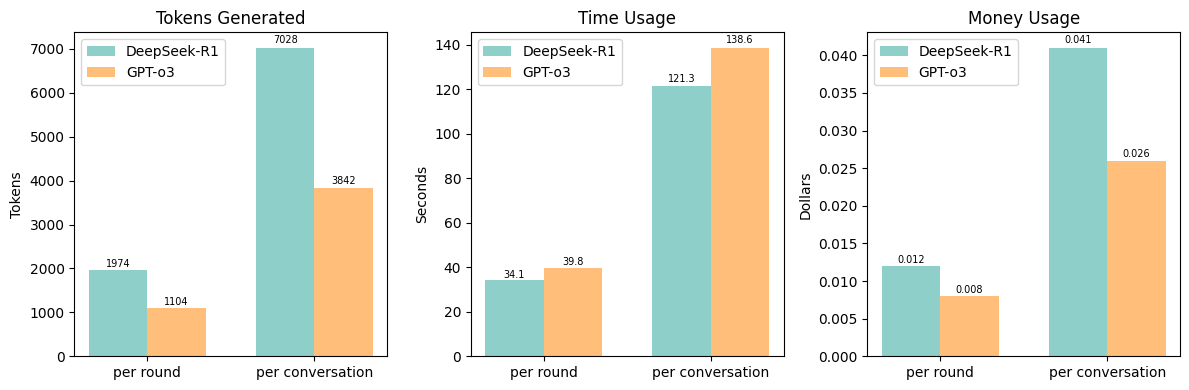

In [18]:
dimensions = ['per round', 'per conversation']
categories = ['DeepSeek-R1', 'GPT-o3']
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 

colors = ['#8ECFC9', '#FFBE7A']

data_token = []
data_time = []
data_money = []

for key in money_time:
    data_token.append([int(money_time[key]['tokens per round']), int(money_time[key]['tokens per question'])])
    data_time.append([round(money_time[key]['seconds per round'],1), round(money_time[key]['seconds per question'],1)])
    data_money.append([round(money_time[key]['dollar per round'],3), round(money_time[key]['dollar per question'],3)])

plot_bar(axes[0], "Tokens Generated", "Tokens", dimensions, data_token, colors, categories)
plot_bar(axes[1], "Time Usage", "Seconds", dimensions, data_time, colors, categories)
plot_bar(axes[2], "Money Usage", "Dollars", dimensions, data_money, colors, categories)

plt.tight_layout()
plt.show()